In [28]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [29]:
Airbnb = pd.read_csv('Airbnb_dataset.csv')

In [24]:
Airbnb.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [25]:
Airbnb.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [26]:
Airbnb.shape

(74111, 11)

In [27]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [7]:
Airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.0,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
accommodates,74108.0,3.155125e+00,2.153603e+00,1.0,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73908.0,1.235272e+00,5.820540e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.0,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74019.0,1.265797e+00,8.521487e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01
log_price,74111.0,4.782069e+00,7.173938e-01,0.0,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00


In [8]:
Airbnb.isnull().sum().sort_values(ascending=False)

review_scores_rating    16722
bathrooms                 203
beds                      131
bedrooms                   92
cancellation_policy         8
room_type                   5
cleaning_fee                4
accommodates                3
log_price                   0
instant_bookable            0
id                          0
dtype: int64

#### Observations

1. Only 3 of the 11 variables do not have missing values. The review score rating column has the largest number of missing values, at 16,722

2. We do not seem to be dealing with much skewness in this date. The mean and 50% quartile is close for almost all the variables

3. We are seeing zero values in variables like bedroom, beds and bathroom. This is assumed to be an error and would be left as is because that was not yet covered at the stage of learning this project relates to

In [10]:
Airbnb.nunique().sort_values(ascending=False)

id                      74111
log_price                 767
review_scores_rating       54
beds                       18
bathrooms                  17
accommodates               16
bedrooms                   11
cancellation_policy         3
room_type                   3
instant_bookable            2
cleaning_fee                2
dtype: int64

#### Dropping columns
We will be dropping columns to make the data more useable. The columns we are dropping now are the 'id' and 'review_scores_rating'. 

The 'id' column would be dropped because it is not so relevant to our analysis

The 'review_scores_rating' column because of the large number of missing values. Imputing would greatly distort the data, so we just drop it.

In [30]:
#dropping id column
Airbnb.drop(columns=['id'], inplace=True)

In [31]:
#dropping review_scores_rating column
Airbnb.drop(columns=['review_scores_rating'], inplace=True)

In [32]:
#fixing data types
cols = Airbnb.select_dtypes(['object'])
cols.columns

Index(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], dtype='object')

In [33]:
for i in cols.columns:
    Airbnb[i] = Airbnb[i].astype('category')

### Let's now see what the data looks like

In [15]:
Airbnb.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,0.0,1.0,4.744932


In [16]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   room_type            74106 non-null  category
 1   accommodates         74108 non-null  float64 
 2   bathrooms            73908 non-null  float64 
 3   cancellation_policy  74103 non-null  category
 4   cleaning_fee         74107 non-null  category
 5   instant_bookable     74111 non-null  category
 6   bedrooms             74019 non-null  float64 
 7   beds                 73980 non-null  float64 
 8   log_price            74111 non-null  float64 
dtypes: category(4), float64(5)
memory usage: 3.1 MB


In [17]:
# filtering object type columns
cat_columns = Airbnb.describe(include=['category']).columns
cat_columns

Index(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], dtype='object')

In [18]:
for i in cat_columns:
    print('Unique values in',i, 'are :')
    print(Airbnb[i].value_counts())
    print('*'*50)

Unique values in room_type are :
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64
**************************************************
Unique values in cancellation_policy are :
strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64
**************************************************
Unique values in cleaning_fee are :
True     54399
False    19708
Name: cleaning_fee, dtype: int64
**************************************************
Unique values in instant_bookable are :
f    54660
t    19451
Name: instant_bookable, dtype: int64
**************************************************


### Data Prepocessing

#### Imputing missing values

In [67]:
#let us see the type of missing values that we have
Airbnb.sample(10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
7573,Entire home/apt,2.0,1.0,moderate,True,f,1.0,1.0,5.298317
37555,Entire home/apt,4.0,2.0,strict,True,f,2.0,2.0,5.616771
67734,Entire home/apt,5.0,1.5,strict,True,f,1.0,2.0,5.164786
19805,Entire home/apt,2.0,1.0,moderate,True,f,1.0,1.0,4.653960
14637,Entire home/apt,3.0,1.0,moderate,True,f,1.0,2.0,4.828314
4378,Entire home/apt,6.0,2.0,strict,True,f,2.0,3.0,5.517453
69061,Entire home/apt,2.0,NaN,strict,True,f,1.0,1.0,5.273000
48234,Entire home/apt,2.0,1.0,strict,False,f,0.0,1.0,4.867534
801,Entire home/apt,7.0,1.0,moderate,True,f,3.0,4.0,5.857933
27631,Entire home/apt,2.0,1.0,strict,True,t,0.0,1.0,5.347108


What can be seen here is NaN but on a closer look at the raw csv data, other missing values are just blank.

There are two options here, impute any of mean, median or mode into the NaNs, then do later for the blanks. Or fill the blanks with NaN and do the imputation of mean/meadian/mode for all NaNs.

We will go with the former. 

In [68]:
Airbnb.median()

accommodates    2.00000
bathrooms       1.00000
bedrooms        1.00000
beds            1.00000
log_price       4.70953
dtype: float64

In [21]:
Airbnb.mean()

accommodates    3.155125
bathrooms       1.235272
bedrooms        1.265797
beds            1.710868
log_price       4.782069
dtype: float64

In [22]:
Airbnb.mode()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,Entire home/apt,2.0,1.0,strict,True,f,1.0,1.0,5.010635


Mode and median have similar numbers for numerical values, and since the mode has values for the columns with categorical values, we will go with filling missing values with the median of each column. Then fill the categorical columns with the modal values

In [69]:
#replacing 'NaN' with each column median values
Airbnb.fillna(Airbnb.median(), inplace=True)
Airbnb.sample(n=10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
20111,Entire home/apt,2.0,1.0,moderate,True,f,1.0,1.0,4.744932
43213,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,4.905275
2244,Entire home/apt,6.0,2.5,strict,True,f,2.0,3.0,6.173786
28627,Entire home/apt,2.0,1.0,strict,True,f,1.0,1.0,4.787492
16516,Entire home/apt,3.0,1.0,strict,True,f,2.0,2.0,4.941642
62773,Entire home/apt,2.0,1.0,moderate,True,f,2.0,2.0,5.105945
27162,Entire home/apt,2.0,1.0,moderate,True,f,0.0,1.0,4.369448
19014,Private room,2.0,1.0,strict,True,t,1.0,1.0,4.442651
26127,Private room,2.0,1.0,strict,False,f,1.0,1.0,4.369448
73945,Entire home/apt,4.0,1.0,moderate,True,t,1.0,3.0,4.787492


In [70]:
Airbnb.isnull().sum().sort_values(ascending=False)

cancellation_policy    8
room_type              5
cleaning_fee           4
log_price              0
beds                   0
bedrooms               0
instant_bookable       0
bathrooms              0
accommodates           0
dtype: int64

Now we're left with column with categorical values to deal with. We will replace all the NaNs there with the mode

#### Replacing NaNs in 'cancellation_policy', 'room_type', 'cleaning_fee' with their respective mode

In [25]:
Airbnb['cancellation_policy'] = Airbnb['cancellation_policy'].replace('', 'strict')
Airbnb['cancellation_policy'].nunique

<bound method IndexOpsMixin.nunique of 0          strict
1          strict
2        moderate
3        flexible
4        moderate
           ...   
74106    flexible
74107    moderate
74108    moderate
74109      strict
74110    moderate
Name: cancellation_policy, Length: 74111, dtype: category
Categories (3, object): ['flexible', 'moderate', 'strict']>

In [26]:
Airbnb['room_type'] = Airbnb['room_type'].replace('', 'Entire home/apt')
Airbnb['room_type'].nunique

<bound method IndexOpsMixin.nunique of 0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
74106       Private room
74107    Entire home/apt
74108    Entire home/apt
74109    Entire home/apt
74110    Entire home/apt
Name: room_type, Length: 74111, dtype: category
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']>

In [27]:
Airbnb['cleaning_fee'] = Airbnb['cleaning_fee'].replace('', 'True')
Airbnb['cleaning_fee'].nunique

<bound method IndexOpsMixin.nunique of 0         True
1         True
2         True
3         True
4         True
         ...  
74106    False
74107     True
74108     True
74109     True
74110    False
Name: cleaning_fee, Length: 74111, dtype: category
Categories (2, object): [False, True]>

In [28]:
#Do we still have missing values anywhere?
Airbnb.notnull().sum().sort_values(ascending=False)

log_price              74111
beds                   74111
bedrooms               74111
instant_bookable       74111
bathrooms              74111
accommodates           74111
cleaning_fee           74107
room_type              74106
cancellation_policy    74103
dtype: int64

In [29]:
Airbnb.isnull().sum().sort_values(ascending=False)

cancellation_policy    8
room_type              5
cleaning_fee           4
log_price              0
beds                   0
bedrooms               0
instant_bookable       0
bathrooms              0
accommodates           0
dtype: int64

Since imputing neither median or mode did not work for these 3 features, we will be dropping the remaining lines with missing values.

In [71]:
Airbnb1 = Airbnb.dropna(axis=0, how='any')
Airbnb1.sample(n=5)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
29161,Private room,1.0,1.0,strict,True,t,1.0,1.0,4.094345
7718,Entire home/apt,6.0,2.0,strict,True,t,2.0,2.0,6.308098
11877,Private room,1.0,1.0,flexible,True,f,1.0,1.0,4.787492
57515,Entire home/apt,4.0,1.0,moderate,True,f,1.0,2.0,4.564348
42865,Entire home/apt,2.0,1.0,strict,True,f,1.0,1.0,4.976734


In [72]:
Airbnb1.isnull().sum().sort_values(ascending=False)

log_price              0
beds                   0
bedrooms               0
instant_bookable       0
cleaning_fee           0
cancellation_policy    0
bathrooms              0
accommodates           0
room_type              0
dtype: int64

We now have no missing values in any of the rows. Now moving on to EDA

### Exploratory Data Analysis (EDA)

In [32]:
# We will be doing uni-variate analysis in order to study their central tendency and dispersion.
# We will write a function that will help us create boxplot and histogram for our numerical 
# variables.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="flare") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [33]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(Airbnb1[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(Airbnb1[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Univariate Analysis

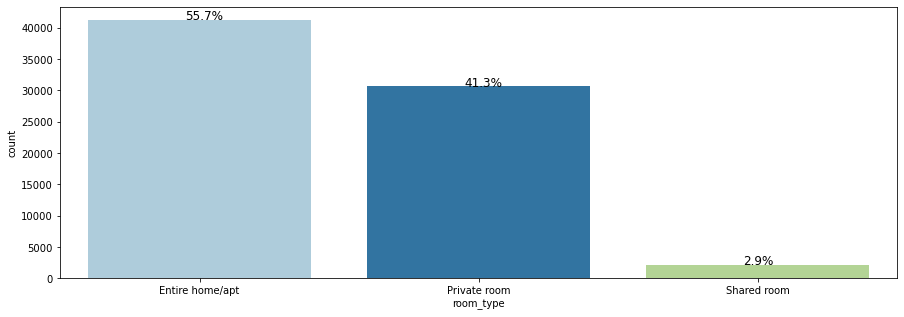

In [34]:
perc_on_bar('room_type')

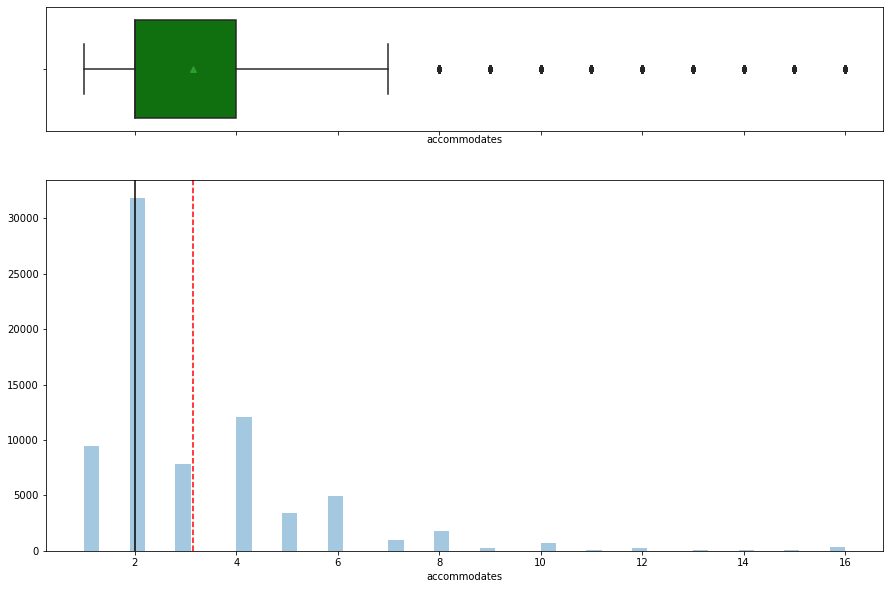

In [35]:
histogram_boxplot(Airbnb['accommodates']);

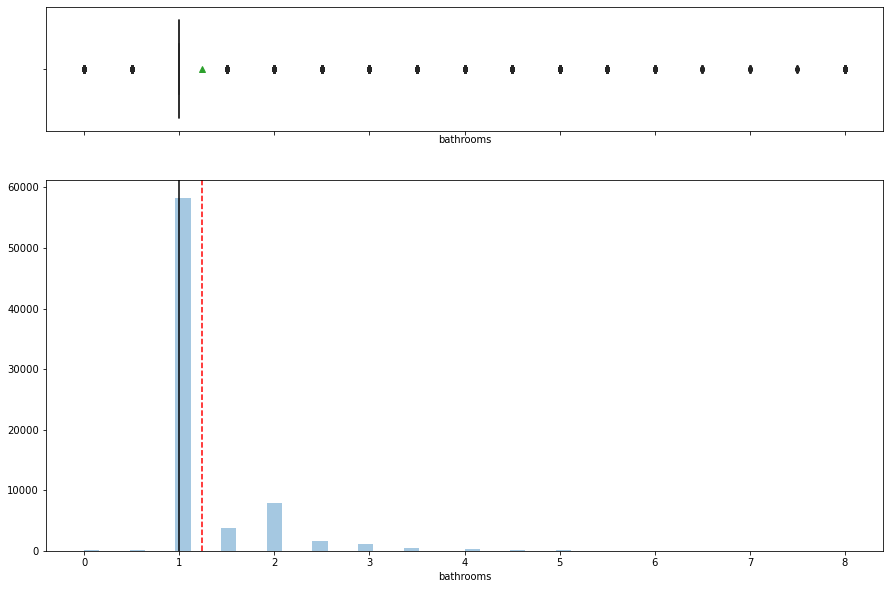

In [36]:
histogram_boxplot(Airbnb1['bathrooms']);

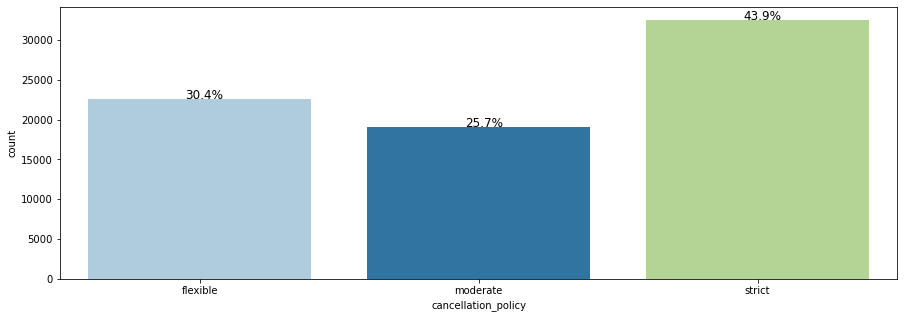

In [37]:
perc_on_bar('cancellation_policy')

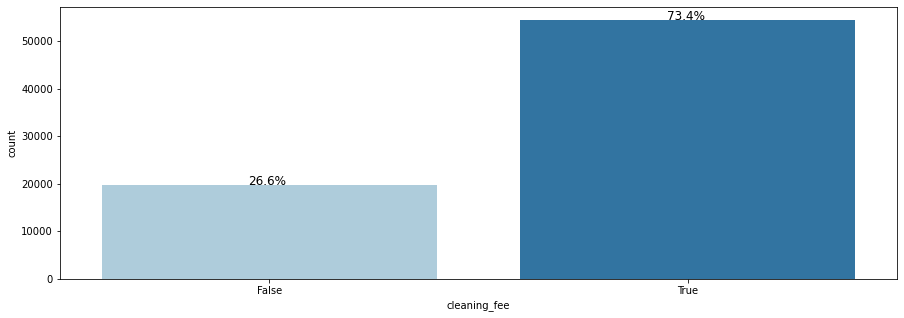

In [38]:
perc_on_bar('cleaning_fee')

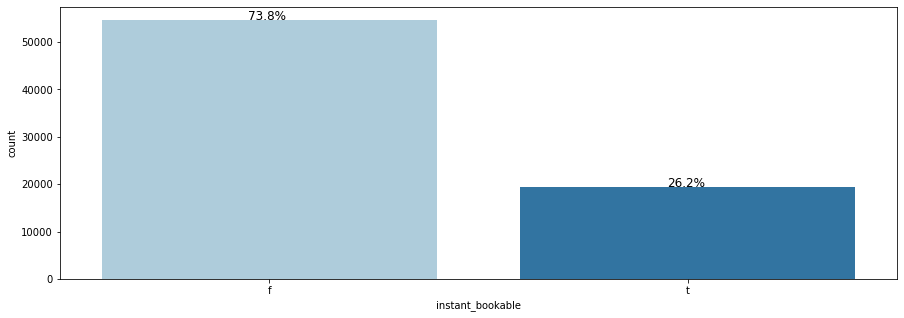

In [39]:
perc_on_bar('instant_bookable')

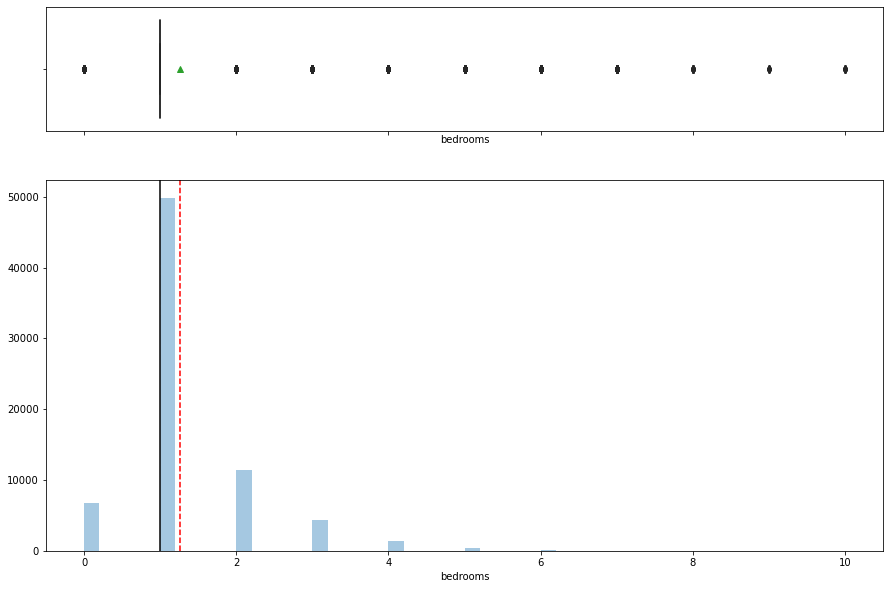

In [40]:
histogram_boxplot(Airbnb1['bedrooms']);

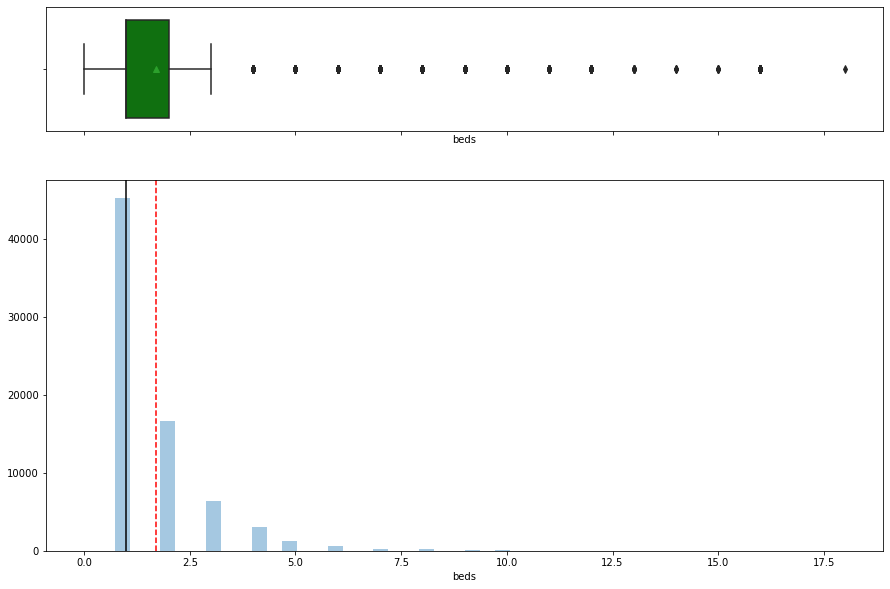

In [41]:
histogram_boxplot(Airbnb1['beds']);

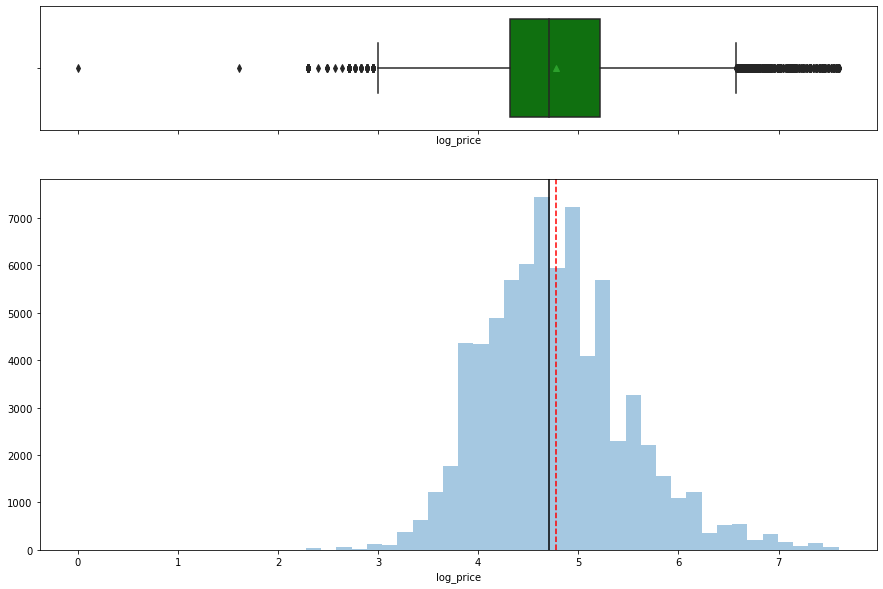

In [42]:
histogram_boxplot(Airbnb1['log_price']);

### Multivariate Analysis

#beds vs Logprice vs bedrooms
plt.figure(figsize=(15,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["bedrooms"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

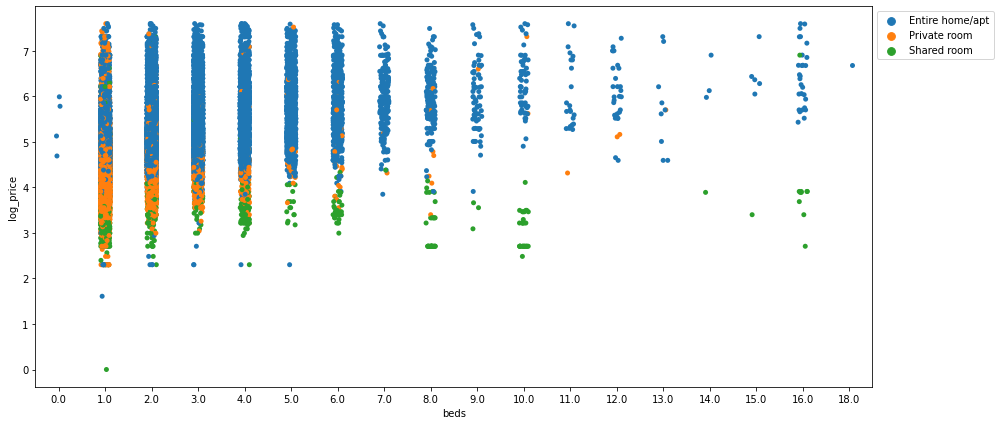

In [44]:
#beds vs Logprice vs roomtype
plt.figure(figsize=(15,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["room_type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

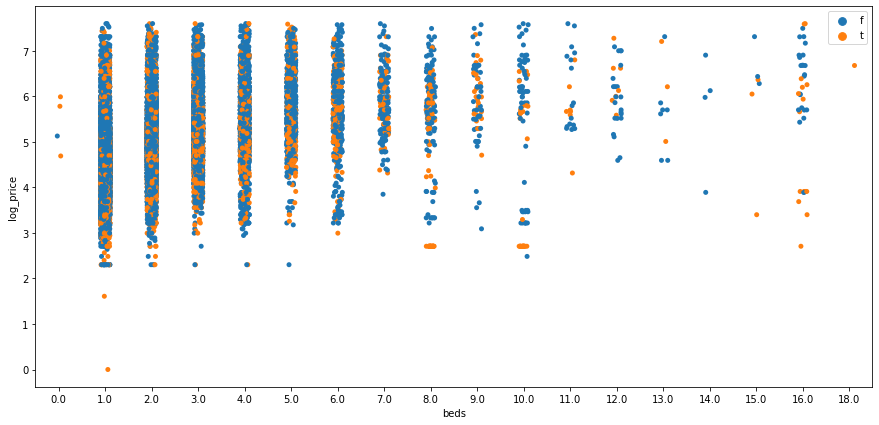

In [45]:
#beds vs Logprice vs instant bookable
plt.figure(figsize=(15,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["instant_bookable"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

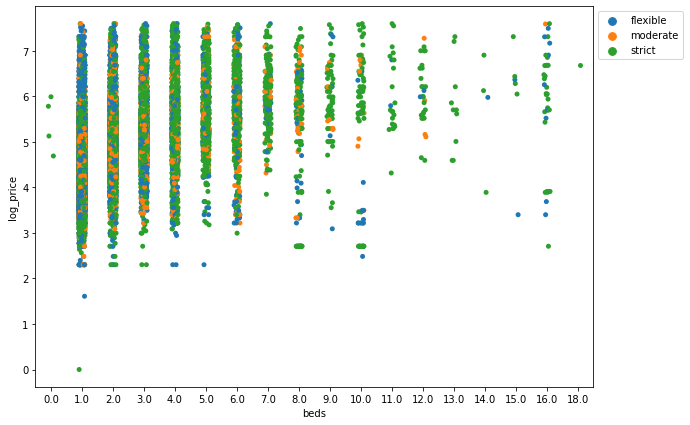

In [46]:
#beds vs Logprice vs cancellation policy
plt.figure(figsize=(10,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["cancellation_policy"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

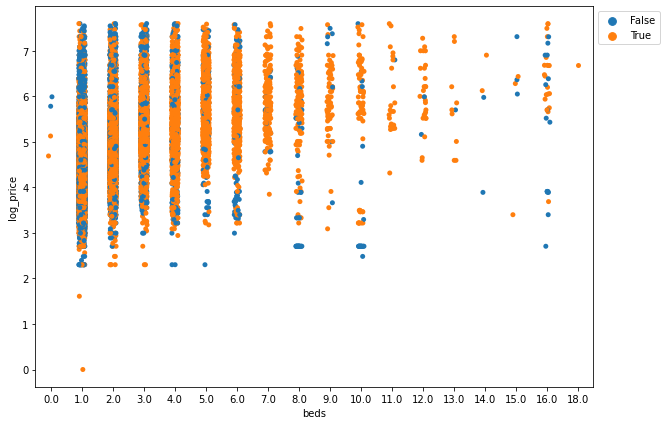

In [47]:
#beds vs Logprice vs cleaning fee
plt.figure(figsize=(10,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["cleaning_fee"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

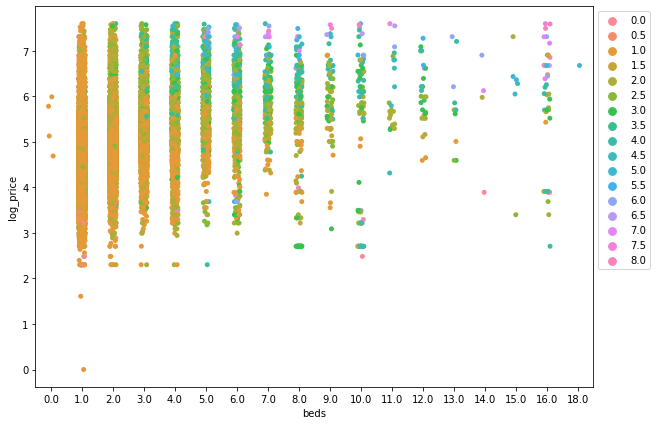

In [48]:
#beds vs Logprice vs bathrooms
plt.figure(figsize=(10,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["bathrooms"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

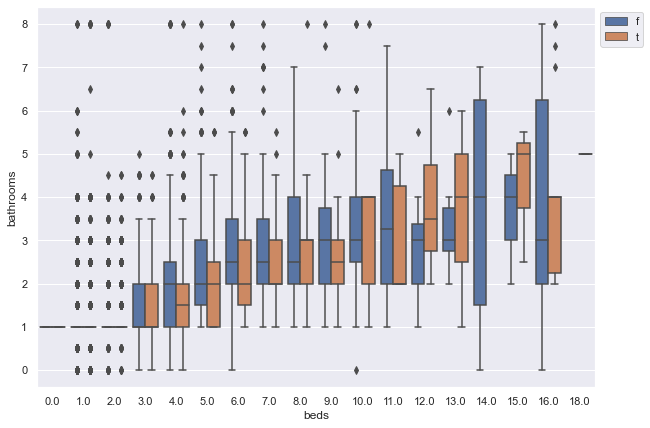

In [80]:
#beds vs bathrooms vs instant bookable
plt.figure(figsize=(10,7))
sns.boxplot(Airbnb1["beds"],Airbnb1["bathrooms"],hue=Airbnb1["instant_bookable"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

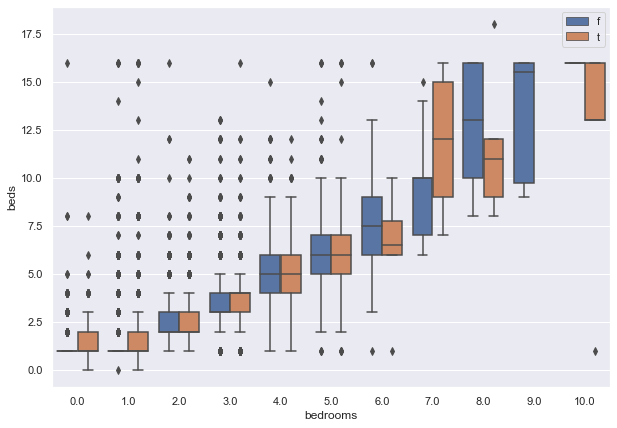

In [94]:
#beds vs bathrooms vs instant bookable
plt.figure(figsize=(10,7))
sns.boxplot(Airbnb1["bedrooms"],Airbnb1["beds"],hue=Airbnb1["instant_bookable"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

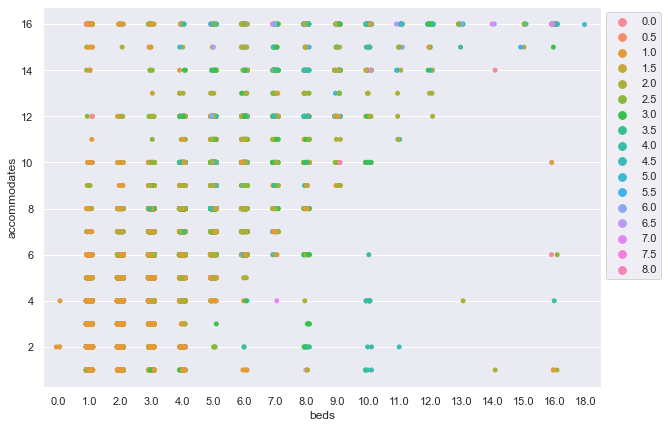

In [93]:
#beds vs accommodates vs bathrooms 
plt.figure(figsize=(10,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["accommodates"],hue=Airbnb1["bathrooms"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

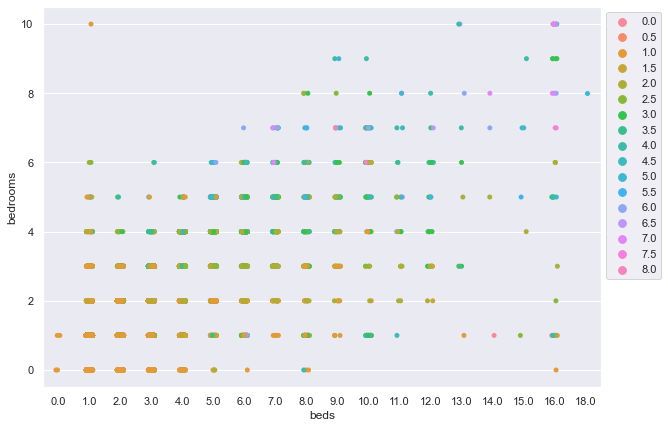

In [88]:
#beds vs bedrooms vs bathrooms
plt.figure(figsize=(10,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["bedrooms"],hue=Airbnb1["bathrooms"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

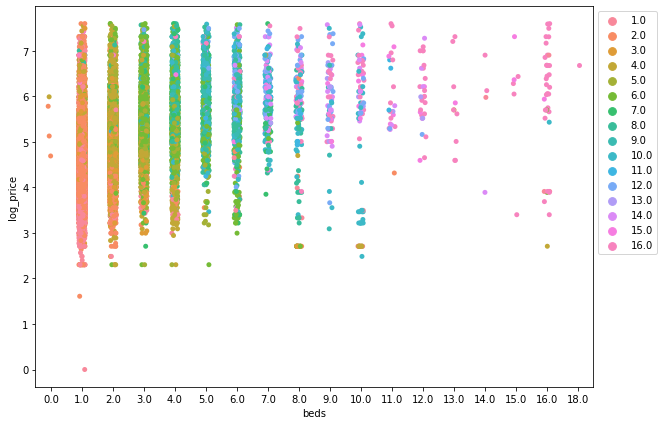

In [49]:
#beds vs Logprice vs accomodates
plt.figure(figsize=(10,7))
sns.stripplot(Airbnb1["beds"],Airbnb1["log_price"],hue=Airbnb1["accommodates"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

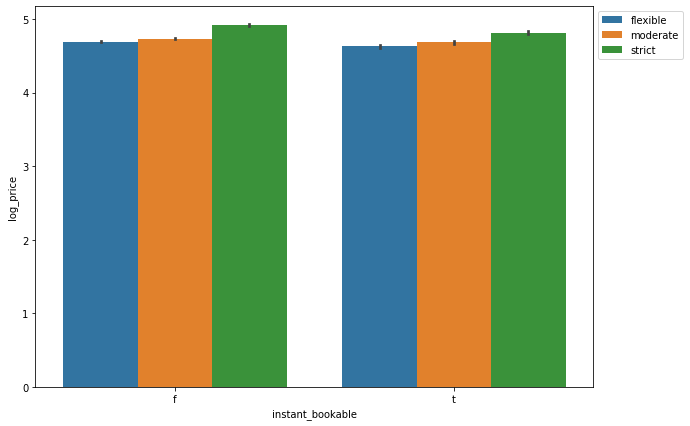

In [50]:
#Logprice vs instantbookablevs cancellation policy
plt.figure(figsize=(10,7))
sns.barplot(Airbnb1["instant_bookable"],Airbnb1["log_price"],hue=Airbnb1["cancellation_policy"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

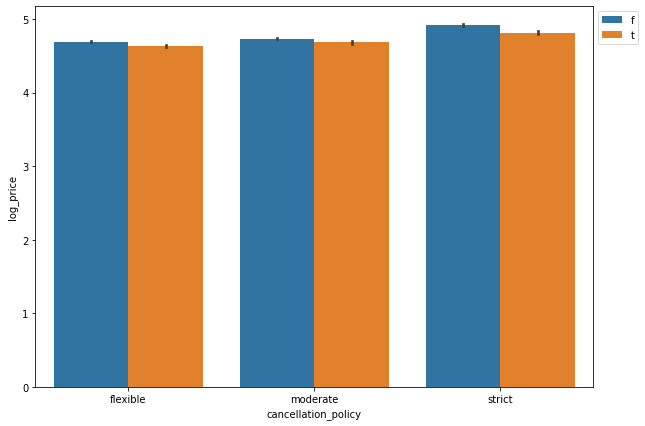

In [51]:
#Logprice vs cancellation policy
plt.figure(figsize=(10,7))
sns.barplot(Airbnb1["cancellation_policy"],Airbnb1["log_price"],hue=Airbnb1["instant_bookable"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

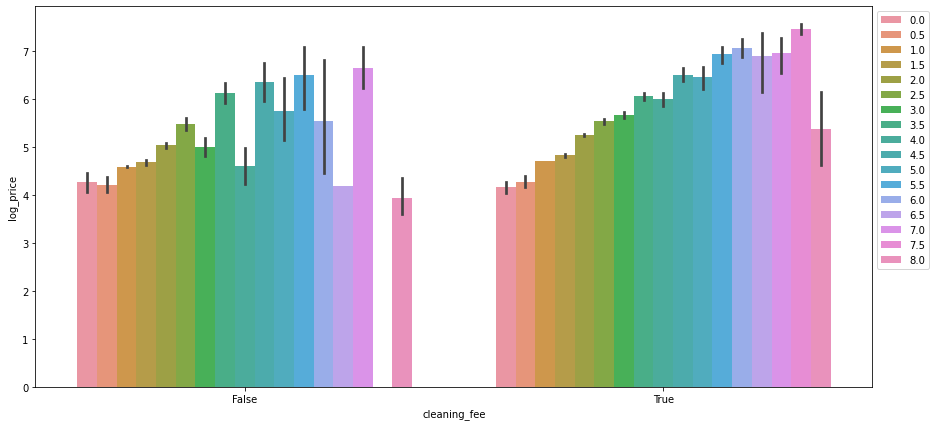

In [52]:
#Logprice vs cleaning fee
plt.figure(figsize=(15,7))
sns.barplot(Airbnb1["cleaning_fee"],Airbnb1["log_price"],hue=Airbnb1["bathrooms"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

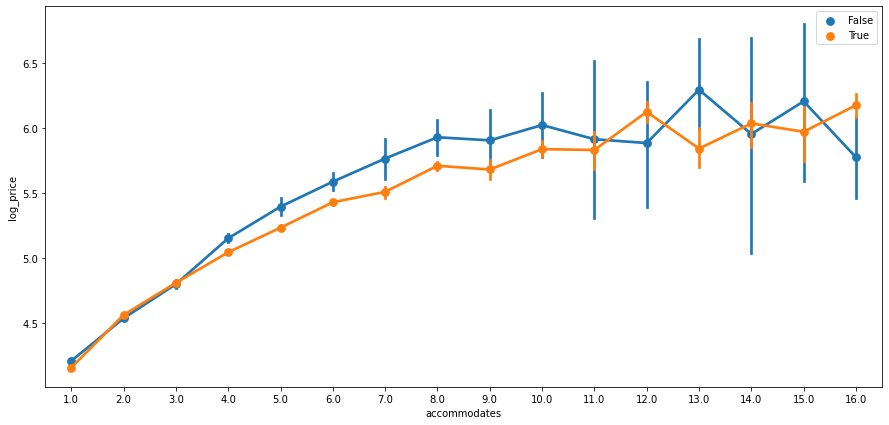

In [53]:
#Logprice vs accommodates
plt.figure(figsize=(15,7))
sns.pointplot(Airbnb1["accommodates"],Airbnb1["log_price"],hue=Airbnb1["cleaning_fee"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

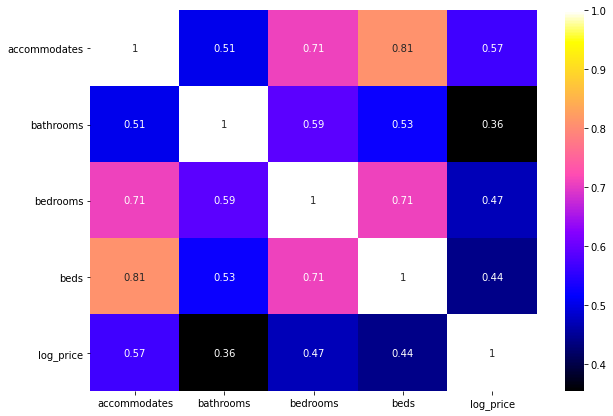

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(Airbnb1.corr(),annot=True, cmap='gnuplot2')
plt.show;

The highest correlation is seen in the relationship between the number of people a house or room can accomodates and number of beds it has. This is followed closely by number of bedrooms and number of beds available.

Log price is mostly correlated to the number of people a room or house can accomodate.

The least correlation we can see here is in the relationship of log price and number of bathrooms available


### Linear Regression

### Model Building

In [55]:
#Defining X and y variables
X = Airbnb.drop(['log_price'], axis=1)
y = Airbnb[['log_price']]

print(X.head())
print(y.head())

         room_type  accommodates  bathrooms cancellation_policy cleaning_fee  \
0  Entire home/apt           3.0        1.0              strict         True   
1  Entire home/apt           7.0        1.0              strict         True   
2  Entire home/apt           5.0        1.0            moderate         True   
3  Entire home/apt           4.0        1.0            flexible         True   
4  Entire home/apt           2.0        1.0            moderate         True   

  instant_bookable  bedrooms  beds  
0                f       1.0   1.0  
1                t       3.0   3.0  
2                t       1.0   3.0  
3                f       2.0   2.0  
4                t       0.0   1.0  
   log_price
0   5.010635
1   5.129899
2   4.976734
3   6.620073
4   4.744932


In [56]:
print(X.shape)
print(y.shape)

(74111, 8)
(74111, 1)


In [57]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Preparing Data for Modelling


#### One-hot encoding and Label Encoding

In [58]:
df_dummies= pd.get_dummies(Airbnb, prefix='RoomType', columns=['room_type'])

In [59]:
df_dummies

,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RoomType_Entire home/apt,RoomType_Private room,RoomType_Shared room
0,3.0,1.0,strict,True,f,1.0,1.0,5.010635,1,0,0
1,7.0,1.0,strict,True,t,3.0,3.0,5.129899,1,0,0
2,5.0,1.0,moderate,True,t,1.0,3.0,4.976734,1,0,0
3,4.0,1.0,flexible,True,f,2.0,2.0,6.620073,1,0,0
4,2.0,1.0,moderate,True,t,0.0,1.0,4.744932,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74106,1.0,1.0,flexible,False,f,1.0,1.0,4.605170,0,1,0
74107,4.0,2.0,moderate,True,f,2.0,4.0,5.043425,1,0,0
74108,5.0,1.0,moderate,True,t,2.0,2.0,5.220356,1,0,0
74109,2.0,1.0,strict,True,t,0.0,2.0,5.273000,1,0,0


In [60]:
df_dummies1= pd.get_dummies(Airbnb, prefix='CancelllationPolicy', columns=['cancellation_policy'])
df_dummies1

,room_type,accommodates,bathrooms,cleaning_fee,instant_bookable,bedrooms,beds,log_price,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
0,Entire home/apt,3.0,1.0,True,f,1.0,1.0,5.010635,0,0,1
1,Entire home/apt,7.0,1.0,True,t,3.0,3.0,5.129899,0,0,1
2,Entire home/apt,5.0,1.0,True,t,1.0,3.0,4.976734,0,1,0
3,Entire home/apt,4.0,1.0,True,f,2.0,2.0,6.620073,1,0,0
4,Entire home/apt,2.0,1.0,True,t,0.0,1.0,4.744932,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,False,f,1.0,1.0,4.605170,1,0,0
74107,Entire home/apt,4.0,2.0,True,f,2.0,4.0,5.043425,0,1,0
74108,Entire home/apt,5.0,1.0,True,t,2.0,2.0,5.220356,0,1,0
74109,Entire home/apt,2.0,1.0,True,t,0.0,2.0,5.273000,0,0,1


In [61]:
df_dummies1.drop(columns=['room_type', 'accommodates', 'bathrooms', 'cleaning_fee', 'instant_bookable', 'bedrooms', 'beds', 'log_price'], inplace=True)
df_dummies1

,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
74106,1,0,0
74107,0,1,0
74108,0,1,0
74109,0,0,1


In [62]:
Airbnb1 = pd.concat([df_dummies,df_dummies1], axis=1)
Airbnb1.head()

,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RoomType_Entire home/apt,RoomType_Private room,RoomType_Shared room,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
0,3.0,1.0,strict,True,f,1.0,1.0,5.010635,1,0,0,0,0,1
1,7.0,1.0,strict,True,t,3.0,3.0,5.129899,1,0,0,0,0,1
2,5.0,1.0,moderate,True,t,1.0,3.0,4.976734,1,0,0,0,1,0
3,4.0,1.0,flexible,True,f,2.0,2.0,6.620073,1,0,0,1,0,0
4,2.0,1.0,moderate,True,t,0.0,1.0,4.744932,1,0,0,0,1,0


In [63]:
#dropping original cancellation policy column
Airbnb1.drop(columns=['cancellation_policy'], inplace=True)
Airbnb1.head(2)

,accommodates,bathrooms,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RoomType_Entire home/apt,RoomType_Private room,RoomType_Shared room,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
0,3.0,1.0,True,f,1.0,1.0,5.010635,1,0,0,0,0,1
1,7.0,1.0,True,t,3.0,3.0,5.129899,1,0,0,0,0,1


In [64]:
#replacing 'instant bookable' strings with numbers 0 and 1
Airbnb1['instant_bookable'] = Airbnb1['instant_bookable'].replace(['f', 't'], ['0', '1'])
Airbnb1.tail(2)

,accommodates,bathrooms,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RoomType_Entire home/apt,RoomType_Private room,RoomType_Shared room,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
74109,2.0,1.0,True,1,0.0,2.0,5.27300,1,0,0,0,0,1
74110,4.0,1.0,False,0,1.0,2.0,4.85203,1,0,0,0,1,0


In [65]:
#replacing 'cleaning fee' strings with numbers 0 and 1
Airbnb1['instant_bookable'] = Airbnb1['instant_bookable'].replace(['f', 't'], ['0', '1'])
Airbnb1.sample(2)

,accommodates,bathrooms,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RoomType_Entire home/apt,RoomType_Private room,RoomType_Shared room,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
65475,10.0,3.0,True,0,1.0,10.0,3.496508,0,0,1,1,0,0
2027,6.0,2.0,False,0,1.0,2.0,4.262680,0,0,1,0,0,1


In [66]:
from sklearn.preprocessing import LabelEncoder #import label encoder
labelencoder = LabelEncoder()
Airbnb2 = Airbnb1
Airbnb1['cleaning_fee'] = labelencoder.fit_transform(df_dummies.cleaning_fee) #returns label encoded variables
Airbnb2.sample(2)


,accommodates,bathrooms,cleaning_fee,instant_bookable,bedrooms,beds,log_price,RoomType_Entire home/apt,RoomType_Private room,RoomType_Shared room,CancelllationPolicy_flexible,CancelllationPolicy_moderate,CancelllationPolicy_strict
4280,1.0,1.0,0,0,1.0,1.0,3.688879,0,0,1,1,0,0
54903,2.0,1.0,1,1,1.0,1.0,4.317488,0,1,0,0,0,1


In [67]:
Airbnb2.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
instant_bookable                0
bedrooms                        0
beds                            0
log_price                       0
RoomType_Entire home/apt        0
RoomType_Private room           0
RoomType_Shared room            0
CancelllationPolicy_flexible    0
CancelllationPolicy_moderate    0
CancelllationPolicy_strict      0
dtype: int64

In [68]:
x = Airbnb2.drop('log_price', axis=1)
y = Airbnb2['log_price']

In [69]:
# Splitting the data into train and test sets in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, shuffle=True)
x_train.shape, x_test.shape

((51877, 12), (22234, 12))

In [70]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(x_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(x_test)    

Intercept of the linear equation: 4.945785436940913

COefficients of the equation are: [ 0.07837985  0.15068276 -0.06974469 -0.05989974  0.15432584 -0.05271038
  0.06311595 -0.58194627 -1.06298436 -0.38147588 -0.4343525  -0.39344131]


In [71]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [72]:
#get the R-square score the fitted train data

print('The coefficient of determination R^2 of the prediction on Train set', regression_model.score(x_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.5147708183905195


In [73]:
# write your own R-square function for the testing data

def r_squared(model, x, y):
    y_mean = y_train.mean()
    SST = ((y_train - y_mean)**2).sum()
    SSE = ((y_train - regression_model.predict(x_train))**2).sum()
    r_square = 1 - SSE/SST
    return SSE, SST, r_square
    
SSE, SST, r_square = r_squared(regression_model, x_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("r_square: ", r_square)

SSE:  12965.794740506735
SST:  26720.970691622162
r_square:  0.5147708183905195


#### Getting score on Test Set

In [74]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(x_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.5126105580915963


In [75]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(x_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.5003363751662601


In [76]:
a = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = regression_model.coef_
coeff_data['Feature'] = x_train.columns
coeff_data = coeff_data.append({'Coefs': regression_model.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

,Coefs,Feature
0,0.078380,accommodates
1,0.150683,bathrooms
2,-0.069745,cleaning_fee
3,-0.059900,instant_bookable
4,0.154326,bedrooms
5,-0.052710,beds
6,0.063116,RoomType_Entire home/apt
7,-0.581946,RoomType_Private room
8,-1.062984,RoomType_Shared room
9,-0.381476,CancelllationPolicy_flexible


In [77]:
# Let us write the equation of the fit
Equation = "log_price ="
print(Equation, end='\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

log_price =	( 0.07837984918667114 ) * accommodates +  ( 0.15068275745200527 ) * bathrooms +  ( -0.0697446908579868 ) * cleaning_fee +  ( -0.059899736621984605 ) * instant_bookable +  ( 0.15432584490154008 ) * bedrooms +  ( -0.05271038085282806 ) * beds +  ( 0.06311594649997804 ) * RoomType_Entire home/apt +  ( -0.5819462690868741 ) * RoomType_Private room +  ( -1.062984363286218 ) * RoomType_Shared room +  ( -0.38147588473348765 ) * CancelllationPolicy_flexible +  ( -0.4343524959351871 ) * CancelllationPolicy_moderate +  ( -0.39344131223824413 ) * CancelllationPolicy_strict +  4.945785436940913


### Using Stats Model OLS

In [78]:
# This adds the constant term beta0 to the Linear Regression.
X_con=sm.add_constant(x)
x_trainc, x_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.30 , random_state=1)

In [83]:
x_trainc=x_train.astype(int)

In [84]:
model = sm.OLS(y_trainc,x_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          3.970e+05
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        14:28:02   Log-Likelihood:                         -37848.
No. Observations:               51877   AIC:                                  7.572e+04
Df Residuals:                   51865   BIC:                                  7.583e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accommodates                     0.0791      0.002     39.456      0.000       0.075       0.083
bathrooms                        0.1441      0.005     28.398      0.000       0.134       0.154
cleaning_fee                    -0.0686      0.005    -12.650      0.000      -0.079      -0.058
instant_bookable                -0.0607      0.005    -12.052      0.000      -0.071      -0.051
bedrooms                         0.1611      0.004     39.181      0.000       0.153       0.169
beds                            -0.0517      0.003    -16.015      0.000      -0.058      -0.045
RoomType_Entire home/apt         3.0219      0.159     19.025      0.000       2.711       3.333
RoomType_Private room            2.3808      0.159     14.990      0.000       2.070       2.692
RoomType_Shared room             1.9001      0.159     11.924      0.000       1.588       2.212
CancelllationPolicy_flexible     1.6054      0.159     10.109      0.000       1.294       1.917
CancelllationPolicy_moderate     1.5518      0.159      9.772      0.000       1.241       1.863
CancelllationPolicy_strict       1.5925      0.159     10.029      0.000       1.281       1.904
==============================================================================
Omnibus:                     5981.272   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15838.842
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.371   Cond. No.                         851.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
print('The variation in the independent variable which is explained by the dependent variable is','\n',
      model.rsquared*100,'%')

The variation in the independent variable which is explained by the dependent variable is 
 98.92295725304028 %


In [88]:
x_testc=x_test.astype(float)
ypred = model.predict(x_testc)

In [89]:
mse = model.mse_model
mse

100018.16761477878

### Adding Interaction terms

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))

0.5357559779917308


In [91]:
#Out of sample (testing) R^2 is our measure of success
print(poly_clf.score(x_test2, y_test))

-2.145374185220455e+17


In [92]:
# but this improves at the cost of 67 extra variables!
print(x_train.shape)
print(x_train2.shape)

(51877, 12)
(51877, 79)


Polynomial Features (with only interaction terms) made the Out of sample R^2 worse even at the cost of a significant increase to the number of variables

